In [4]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
raw_data = pd.read_csv('epi_r.csv')
raw_data

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Ham and Spring Vegetable Salad with Shallot Vi...,4.375,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Spicy-Sweet Kumquats,3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Korean Marinated Beef,4.375,170.0,7.0,10.0,1272.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Ham Persillade with Mustard Potato Salad and M...,3.750,602.0,23.0,41.0,1696.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [5]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

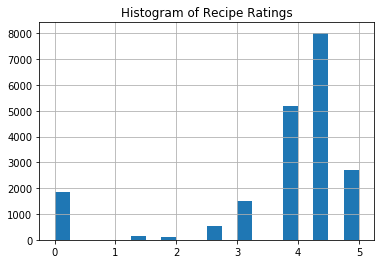

In [6]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [8]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [16]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

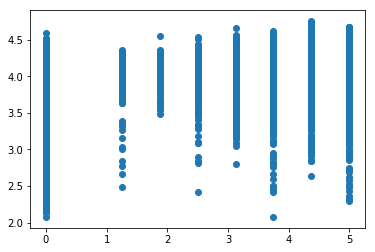

In [10]:
plt.scatter(Y, svr.predict(X))

In [ ]:
svr.score(X, Y)

0.038565706512988962

In [5]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([ 0.01818511,  0.026411  ,  0.03037705,  0.01957949,  0.02451197])

 # Challeng
 ### PCA to reduce fetures to 30
 ### not include nutritional info/ include
 ### Turn the problem in to binary classifier

In [17]:
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [7]:
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(X)
comp30Df = pd.DataFrame(data = principalComponents)

In [9]:
comp30Df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.731148,-1.707694,-1.195156,0.190161,0.011141,0.663493,-2.802800,0.888399,-0.051542,-1.224680,...,1.418379,-0.488161,-0.520322,-0.698660,-1.065159,1.772039,-1.345804,-1.072878,-2.101765,1.223581
1,2.335080,1.093392,-1.339850,-2.300544,0.834886,-1.247509,-0.038772,-1.130876,1.942842,1.040479,...,1.024813,-0.085229,0.571516,0.183711,-0.951043,0.473201,0.715425,0.659845,1.147602,0.946194
2,1.910812,-1.246102,-1.005554,-0.862471,-0.423855,1.248141,0.780735,-0.341431,0.159800,-1.989258,...,-0.561132,-0.299399,0.000836,-0.165154,-0.067005,0.783424,0.050220,0.115071,-1.181308,0.510740
3,-2.473968,-2.392191,1.561604,-0.062004,-0.556696,-0.782160,0.146316,2.943866,2.384887,-1.910747,...,1.375773,-1.693650,-0.458785,0.696173,0.450357,0.192672,-0.908245,1.422837,-1.344439,0.654100
4,0.683535,-0.683581,-1.873018,-1.185740,-0.222186,2.054297,-1.801593,-0.513023,0.184169,-1.369309,...,0.289607,1.078651,0.740524,-1.194350,0.463662,-0.503943,0.863052,0.496388,1.158885,-0.485136


In [8]:
cross_val_score(svr, comp30Df, Y, cv=5)

array([ 0.10098154,  0.09726868,  0.0878719 ,  0.1232106 ,  0.10844575])

## Removed nan

In [21]:
raw_data2 = raw_data.dropna()
raw_data2

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Korean Marinated Beef,4.375,170.0,7.0,10.0,1272.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Ham Persillade with Mustard Potato Salad and M...,3.750,602.0,23.0,41.0,1696.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,"Yams Braised with Cream, Rosemary and Nutmeg",3.750,256.0,4.0,5.0,30.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,Banana-Chocolate Chip Cake With Peanut Butter ...,4.375,766.0,12.0,48.0,439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,Beef Tenderloin with Garlic and Brandy,4.375,174.0,11.0,12.0,176.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = raw_data2.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data2.rating
svr.fit(X,Y)

In [18]:
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(X)
comp30Df = pd.DataFrame(data = principalComponents)

In [19]:
cross_val_score(svr, comp30Df, Y, cv=5)

array([ 0.07252797,  0.06589516,  0.05072046,  0.105786  ,  0.08508043])

## Don't drop the nutrition

In [22]:
X = raw_data2.drop(['rating', 'title'], 1)
Y = raw_data2.rating
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(X)
comp30Df = pd.DataFrame(data = principalComponents)

In [25]:
pca.explained_variance_ratio_

array([  9.98156998e-01,   1.81442630e-03,   2.82392339e-05,
         3.36609262e-07,   5.32730250e-12,   1.95922757e-12,
         1.72749608e-12,   1.15022465e-12,   9.64487357e-13,
         7.78658715e-13,   6.84183376e-13,   6.44296978e-13,
         6.01499061e-13,   5.67893825e-13,   5.31724941e-13,
         5.20179389e-13,   4.70003010e-13,   4.45051956e-13,
         4.29719441e-13,   4.07797412e-13,   3.89309963e-13,
         3.77022073e-13,   3.67408153e-13,   3.49199800e-13,
         3.43671225e-13,   3.39998023e-13,   3.30079165e-13,
         3.25022058e-13,   3.15404407e-13,   3.03880790e-13])

In [24]:
cross_val_score(svr, comp30Df, Y, cv=5)

array([ 0.06358337,  0.07757196,  0.07333608,  0.06378393,  0.06905207])

## Binary classifier

In [88]:
Y = raw_data2.rating
comp30Df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-8223.142475,-142.739567,-15.782235,-20.268463,-0.975802,-0.027370,-0.011212,0.002434,0.053516,0.284657,...,-0.312182,0.099215,-0.161825,-0.260901,0.086671,0.988477,-0.464060,-0.073236,-0.095816,-0.480359
1,-7641.311444,514.331186,-56.083359,38.344665,-0.965857,0.561188,-0.535005,0.536608,-0.296755,-0.054654,...,-0.145033,0.513646,-0.029728,0.049493,0.295839,-0.188144,-0.124112,0.271825,0.105621,0.359344
2,-8682.205562,-255.740090,-36.340951,-18.750956,-1.008064,-0.271462,0.662192,0.249242,-0.119540,0.215094,...,0.368697,0.183789,0.052785,0.016163,0.290322,0.191519,-0.070189,0.479420,0.362076,-0.245543
3,-8206.273230,-305.329399,-24.642355,-16.209726,-0.458911,0.383311,-0.353184,-0.168378,-1.428663,-0.681833,...,0.349019,0.281433,0.647805,0.015766,0.057776,0.720678,0.062856,0.706645,-0.077678,0.217595
4,-7509.672679,-148.801319,-40.392570,17.100456,-0.982232,-0.121334,-0.573154,-0.829882,0.316669,-0.783218,...,-0.317619,-0.409814,0.082876,-0.346680,0.218177,0.568182,-0.091275,-0.236850,-0.218260,-0.190172


In [89]:
# Dividing the outcome into above and below 3.72 (The mean)
Y = pd.DataFrame(Y)
Y = np.where(Y['rating'] <= 3.72, 0, 1)


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(comp30Df,Y)

In [87]:
cross_val_score(svc, comp30Df, Y, cv=5)

array([ 0.82823826,  0.82382603,  0.82351087,  0.82697762,  0.82912989])